<a href="https://colab.research.google.com/github/Sharifa-Mohammedi/My_Data-Science-Project/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded= files.upload()



Saving date_to_week_id_map.csv to date_to_week_id_map (1).csv
Saving product_prices.csv to product_prices (1).csv
Saving test_data_M.csv to test_data_M (1).csv
Saving train_data_M.csv to train_data_M (1).csv


In [ ]:
df_train=pd.read_csv('train_data_M.csv')
df_train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [ ]:
df_train.shape

(395000, 7)

In [ ]:
df_train.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [ ]:
product_prices=pd.read_csv('product_prices.csv')

In [ ]:
product_prices.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [ ]:
product_prices.shape

(59000, 4)

In [ ]:
date_to_week_id_map=pd.read_csv('date_to_week_id_map.csv')

In [ ]:
date_to_week_id_map.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [ ]:
dataset=pd.merge(product_prices,date_to_week_id_map, on=['week_id'], how='inner')
df_train=pd.merge(df_train,dataset, on=['date','product_identifier','outlet'], how='inner')
df_train

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [ ]:
df_train.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [ ]:
df_train.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [ ]:
df_train.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [ ]:
df_train['date'].unique()

array(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
       '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
       '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
       '2012-01-13', '2012-01-14', '2012-01-15', '2012-01-16',
       '2012-01-17', '2012-01-18', '2012-01-19', '2012-01-20',
       '2012-01-21', '2012-01-22', '2012-01-23', '2012-01-24',
       '2012-01-25', '2012-01-26', '2012-01-27', '2012-01-28',
       '2012-01-29', '2012-01-30', '2012-01-31', '2012-02-01',
       '2012-02-02', '2012-02-03', '2012-02-04', '2012-02-05',
       '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09',
       '2012-02-10', '2012-02-11', '2012-02-12', '2012-02-13',
       '2012-02-14', '2012-02-15', '2012-02-16', '2012-02-17',
       '2012-02-18', '2012-02-19', '2012-02-20', '2012-02-21',
       '2012-02-22', '2012-02-23', '2012-02-24', '2012-02-25',
       '2012-02-26', '2012-02-27', '2012-02-28', '2012-02-29',
       '2012-03-01', '2012-03-02', '2012-03-03', '2012-

In [ ]:
df_train['category_of_product'].unique()

array(['others', 'fast_moving_consumer_goods', 'drinks_and_food'],
      dtype=object)

In [ ]:
df_train['category_of_product']=df_train['category_of_product'].map({'fast_moving_consumer_goods':0, 'drinks_and_food':1, 'others':2})
df_train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,2,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,2,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,2,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,2,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,0,111,Maharashtra,0,49,4.88


In [ ]:
df_train.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f3b00290>,
      dtype=object)

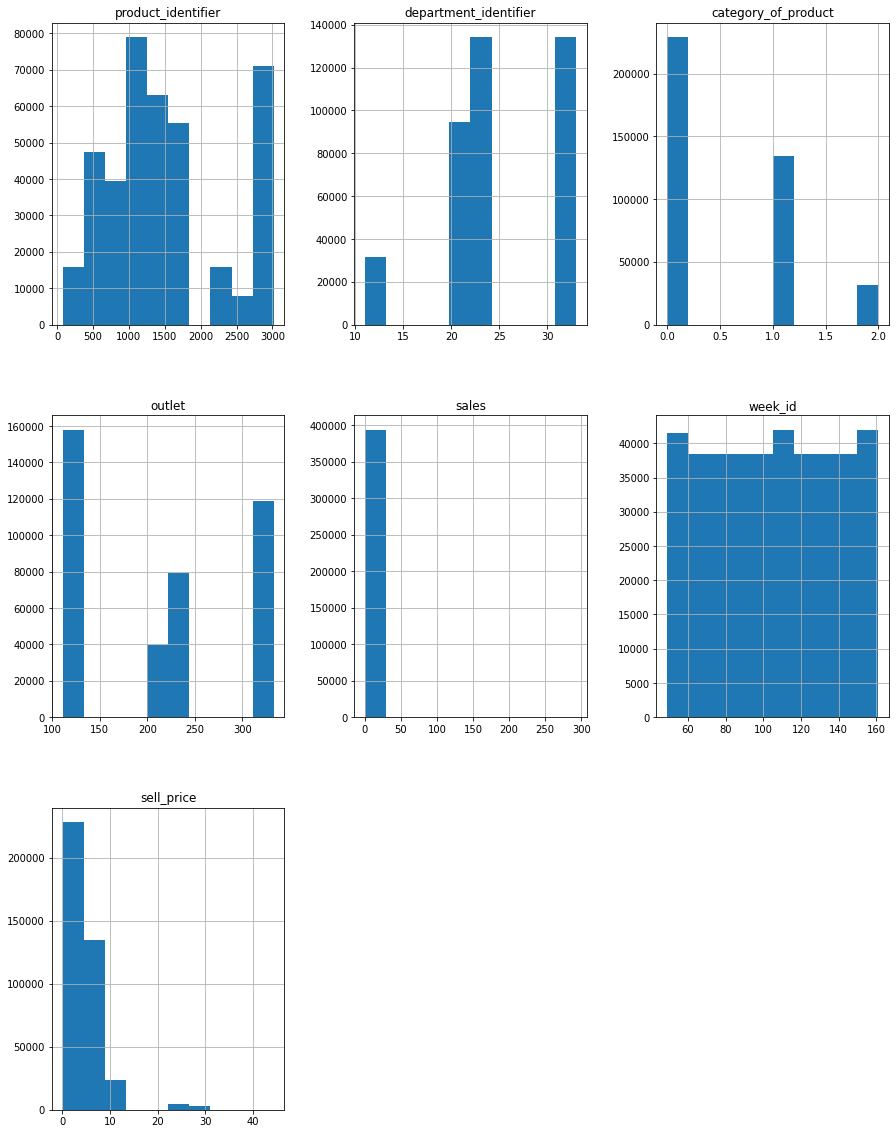

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_train.hist(ax=ax)

In [ ]:
df_train['state'].unique()

array(['Maharashtra', 'Telangana', 'Kerala'], dtype=object)

In [ ]:
df_train['state']=df_train['state'].map({'Maharashtra':0, 'Telangana':1, 'Kerala':2})
df_train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,2,111,0,0,49,2.94
1,2012-01-01,337,11,2,111,0,1,49,7.44
2,2012-01-01,423,12,2,111,0,0,49,0.97
3,2012-01-01,432,12,2,111,0,0,49,4.97
4,2012-01-01,581,21,0,111,0,0,49,4.88


In [ ]:
df_train.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [ ]:
df_train['Date']=df_train['date'].str.split('-').str[0]

df_train['month']=df_train['date'].str.split('-').str[1]
df_train['year']=df_train['date'].str.split('-').str[2]


In [ ]:
df_train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,Date,month,year
0,2012-01-01,74,11,2,111,0,0,49,2.94,2012,01,01
1,2012-01-01,337,11,2,111,0,1,49,7.44,2012,01,01
2,2012-01-01,423,12,2,111,0,0,49,0.97,2012,01,01
3,2012-01-01,432,12,2,111,0,0,49,4.97,2012,01,01
4,2012-01-01,581,21,0,111,0,0,49,4.88,2012,01,01


In [ ]:
df_train.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
week_id                    int64
sell_price               float64
Date                      object
month                     object
year                      object
dtype: object

In [ ]:
df_train['Date'] = df_train['Date'].astype(int)
df_train['month'] = df_train['month'].astype(int)
df_train['year'] = df_train['year'].astype(int)

In [ ]:
df_train.dtypes

product_identifier         int64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
week_id                    int64
sell_price               float64
Date                       int64
month                      int64
year                       int64
dtype: object

In [ ]:
df_train=df_train.drop('date', axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_train))

StandardScaler()


In [ ]:
print(scaler.transform(df_train))

[[-1.77323126 -2.12374707  2.34260643 ... -0.98285096 -1.43817459
  -1.67331974]
 [-1.44845911 -2.12374707  2.34260643 ... -0.98285096 -1.43817459
  -1.67331974]
 [-1.34225985 -1.96596497  2.34260643 ... -0.98285096 -1.43817459
  -1.67331974]
 ...
 [ 1.8449528   1.34745914  0.78086881 ...  2.23227225 -1.15853936
   1.39906643]
 [ 1.84989231  1.34745914  0.78086881 ...  2.23227225 -1.15853936
   1.39906643]
 [ 1.86594568  1.34745914  0.78086881 ...  2.23227225 -1.15853936
   1.39906643]]


In [ ]:
df_train.corr()

,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,Date,month,year
product_identifier,1.000000e+00,9.099899e-01,2.510588e-01,2.286007e-17,1.885793e-17,0.152893,1.159105e-14,-0.201074,9.646063e-15,3.090176e-15,1.049793e-15
department_identifier,9.099899e-01,1.000000e+00,1.552410e-01,6.817693e-18,1.939918e-18,0.190038,-1.973939e-14,-0.302860,-2.033863e-14,1.808373e-16,1.753639e-16
category_of_product,2.510588e-01,1.552410e-01,1.000000e+00,-1.136040e-17,-1.194330e-17,0.124177,-8.482837e-15,-0.372523,-8.443372e-15,-1.585918e-15,-2.673498e-16
outlet,2.286007e-17,6.817693e-18,-1.136040e-17,1.000000e+00,9.999451e-01,-0.021005,2.327934e-14,-0.000140,1.170790e-14,1.284597e-14,8.393183e-16
state,1.885793e-17,1.939918e-18,-1.194330e-17,9.999451e-01,1.000000e+00,-0.020960,-4.848819e-15,-0.000129,-1.066462e-14,7.065545e-16,1.847732e-16
sales,1.528933e-01,1.900381e-01,1.241772e-01,-2.100456e-02,-2.096025e-02,1.000000,-1.896909e-02,-0.198098,-2.105255e-02,5.262983e-03,-2.192815e-02
week_id,1.159105e-14,-1.973939e-14,-8.482837e-15,2.327934e-14,-4.848819e-15,-0.018969,1.000000e+00,0.004532,8.846782e-01,2.447021e-01,3.415249e-02
sell_price,-2.010739e-01,-3.028601e-01,-3.725227e-01,-1.403172e-04,-1.288576e-04,-0.198098,4.531863e-03,1.000000,4.277186e-03,5.675647e-04,1.406005e-04
Date,9.646063e-15,-2.033863e-14,-8.443372e-15,1.170790e-14,-1.066462e-14,-0.021053,8.846782e-01,0.004277,1.000000e+00,-2.339195e-01,-1.008316e-02
month,3.090176e-15,1.808373e-16,-1.585918e-15,1.284597e-14,7.065545e-16,0.005263,2.447021e-01,0.000568,-2.339195e-01,1.000000e+00,1.229825e-02


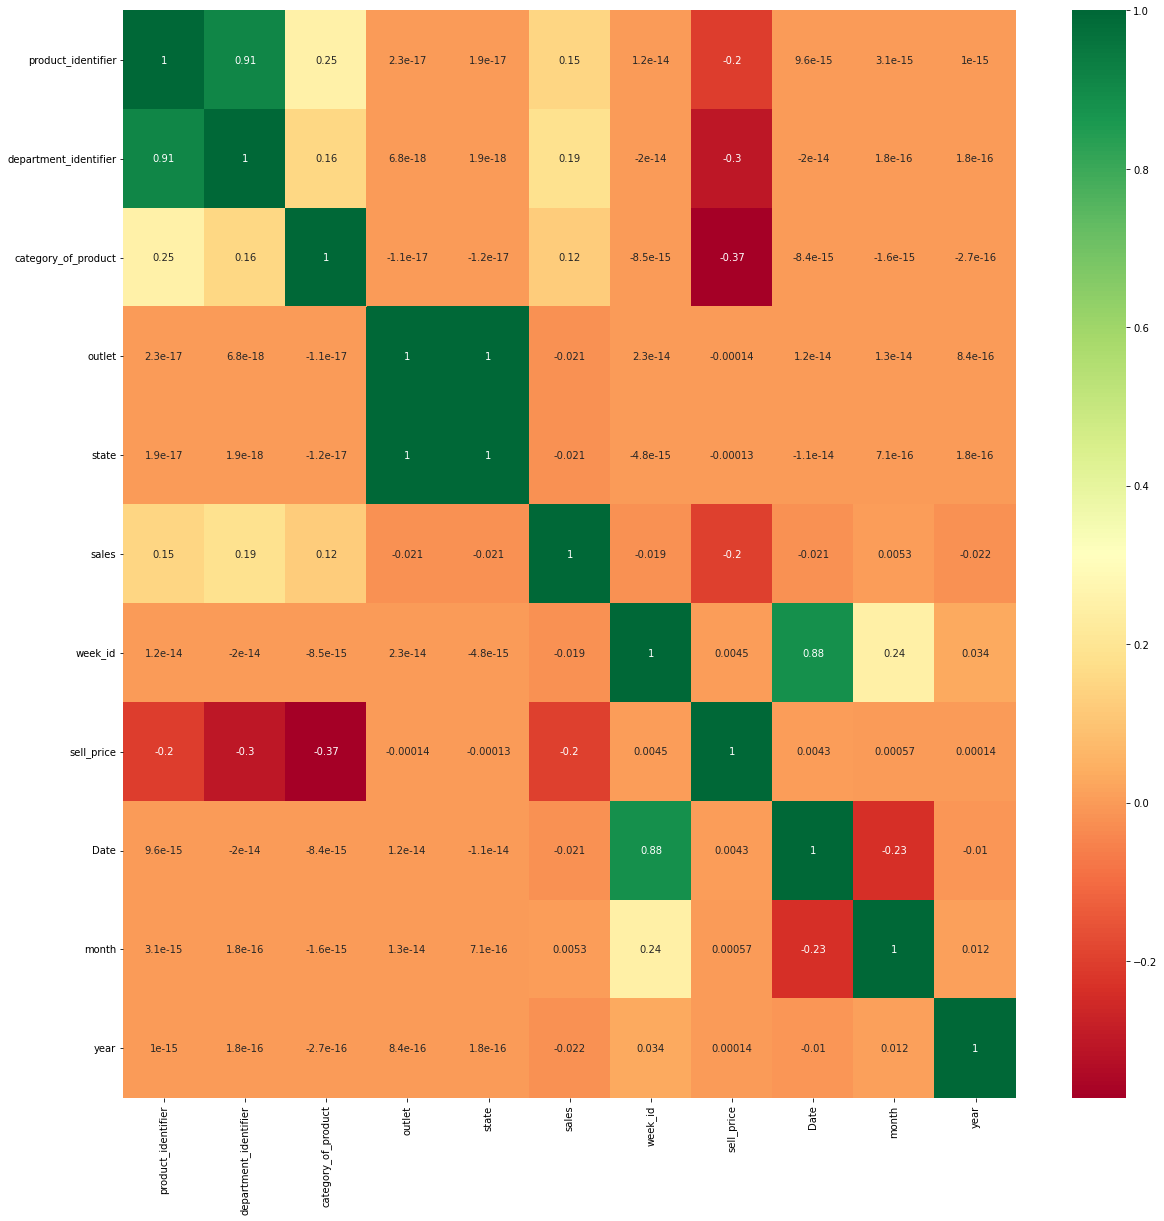

In [ ]:
cr=df_train.corr()
top_cor_features=cr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_train[top_cor_features].corr(),annot=True, cmap="RdYlGn")

In [ ]:
df_train.head()


,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,Date,month,year
0,74,11,2,111,0,0,49,2.94,2012,1,1
1,337,11,2,111,0,1,49,7.44,2012,1,1
2,423,12,2,111,0,0,49,0.97,2012,1,1
3,432,12,2,111,0,0,49,4.97,2012,1,1
4,581,21,0,111,0,0,49,4.88,2012,1,1


In [ ]:
y_train = df_train['sales']

In [ ]:
X_train=df_train.drop('sales', axis=1)

Test_data


In [ ]:
df_test=pd.read_csv('test_data_M.csv')
df_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [ ]:
df_test.shape

(15500, 7)

In [ ]:
dataset=pd.merge(product_prices,date_to_week_id_map, on=['week_id'], how='inner')
df_test=pd.merge(df_test,dataset, on=['date','product_identifier','outlet'], how='inner')
df_test

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [ ]:
df_test.describe()

,id,product_identifier,department_identifier,outlet,week_id,sell_price
count,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000
mean,7750.500000,1509.960000,24.460000,211.200000,163.741935,4.988229
std,4474.608921,809.824616,6.338059,91.164117,1.294390,3.879690
min,1.000000,74.000000,11.000000,111.000000,162.000000,0.200000
25%,3875.750000,926.000000,21.000000,113.000000,163.000000,2.640000
50%,7750.500000,1325.000000,22.000000,221.500000,164.000000,3.970000
75%,11625.250000,1753.000000,31.000000,331.000000,165.000000,6.680000
max,15500.000000,3021.000000,33.000000,333.000000,166.000000,25.970000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15500 entries, 0 to 15499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15500 non-null  int64  
 1   date                   15500 non-null  object 
 2   product_identifier     15500 non-null  int64  
 3   department_identifier  15500 non-null  int64  
 4   category_of_product    15500 non-null  object 
 5   outlet                 15500 non-null  int64  
 6   state                  15500 non-null  object 
 7   week_id                15500 non-null  int64  
 8   sell_price             15500 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.2+ MB


In [ ]:
df_test.isnull().sum()

id                       0
date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
week_id                  0
sell_price               0
dtype: int64

In [ ]:
df_test.dtypes

id                         int64
date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
week_id                    int64
sell_price               float64
dtype: object

In [ ]:
df_test.columns

Index(['id', 'date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'week_id', 'sell_price'],
      dtype='object')

In [ ]:
df_test['category_of_product'].unique()

array(['others', 'fast_moving_consumer_goods', 'drinks_and_food'],
      dtype=object)

In [ ]:
df_test['category_of_product']=df_test['category_of_product'].map({'fast_moving_consumer_goods':0, 'drinks_and_food':1, 'others':2})
df_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,2,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,2,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,2,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,2,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,0,111,Maharashtra,162,4.88


In [ ]:
df_test['state'].unique()

array(['Maharashtra', 'Telangana', 'Kerala'], dtype=object)

In [ ]:
df_test['state']=df_test['state'].map({'Maharashtra':0, 'Telangana':1, 'Kerala':2})
df_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,2,111,0,162,3.43
1,2,2014-03-01,337,11,2,111,0,162,7.78
2,3,2014-03-01,423,12,2,111,0,162,0.97
3,4,2014-03-01,432,12,2,111,0,162,4.97
4,5,2014-03-01,581,21,0,111,0,162,4.88


In [ ]:
df_test['Date']=df_test['date'].str.split('-').str[0]

df_test['month']=df_test['date'].str.split('-').str[1]
df_test['year']=df_test['date'].str.split('-').str[2]

In [ ]:
df_test['Date'] = df_test['Date'].astype(int)
df_test['month'] = df_test['month'].astype(int)
df_test['year'] = df_test['year'].astype(int)

In [ ]:
df_test.dtypes

id                         int64
date                      object
product_identifier         int64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
week_id                    int64
sell_price               float64
Date                       int64
month                      int64
year                       int64
dtype: object

In [ ]:
df_test=df_test.drop('date', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_test))

StandardScaler()


In [ ]:
print(scaler.transform(df_test))

[[-1.73193907 -1.77323126 -2.12374707 ...  0.          0.
  -1.67705098]
 [-1.73171558 -1.44845911 -2.12374707 ...  0.          0.
  -1.67705098]
 [-1.73149209 -1.34225985 -1.96596497 ...  0.          0.
  -1.67705098]
 ...
 [ 1.73149209  1.8449528   1.34745914 ...  0.          0.
   1.67705098]
 [ 1.73171558  1.84989231  1.34745914 ...  0.          0.
   1.67705098]
 [ 1.73193907  1.86594568  1.34745914 ...  0.          0.
   1.67705098]]


model_fit

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X_train, y_train, test_size=0.33, random_state=44)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred, y_test)
MSE

6.885976333879474

In [ ]:
import math
RMSE = math.sqrt(MSE)
RMSE

2.6241143903952575

In [ ]:
CSV=pd.DataFrame({'sales'}:y_pred)
CSV.to_csv('prediction.csv',index=False)

SyntaxError: ignored